In [1]:
# 导入相关库
import numpy as np
import akshare as ak
import pandas as pd
import pytz
import rqdatac
import datetime as dt
import matplotlib.pyplot as plt
import os

start_date = 20150101
end_date = dt.datetime.now(pytz.timezone("Asia/Shanghai")).strftime("%Y%m%d")

rqdatac.init()

T_df = rqdatac.futures.get_dominant_price(
    underlying_symbols="T",
    start_date=start_date,
    end_date=end_date,
    frequency="1d",
    fields=None,
    adjust_type="pre",
    adjust_method="prev_close_spread",
)

TS_df = rqdatac.futures.get_dominant_price(
    underlying_symbols="TS",
    start_date=start_date,
    end_date=end_date,
    frequency="1d",
    fields=None,
    adjust_type="pre",
    adjust_method="prev_close_spread",
)



# 中国宏观杠杆率
"""名称	类型	描述
年份	object	日期, 年-月
居民部门	float64	-
非金融企业部门	float64	-
政府部门	float64	-
中央政府	float64	-
地方政府	float64	-
实体经济部门	float64	-
金融部门资产方	float64	-
金融部门负债方	float64	-
"""
macro_cnbs_df = ak.macro_cnbs()
macro_cnbs_df.columns = [
    "Year",
    "Household Sector",
    "Non-Financial Corporate Sector",
    "Government Sector",
    "Central Government",
    "Local Government",
    "Real Economy Sector",
    "Financial Sector Assets",
    "Financial Sector Liabilities",
]
macro_cnbs_df["Year"] = pd.to_datetime(macro_cnbs_df["Year"])
# 国民经济运行状况
"""名称	类型	描述
月份	object	-
总指数-指数值	float64	-
总指数-同比增长	float64	注意单位: %
总指数-环比增长	float64	注意单位: %
农产品-指数值	float64	-
农产品-同比增长	float64	注意单位: %
农产品-环比增长	float64	注意单位: %
矿产品-指数值	float64	-
矿产品-同比增长	float64	注意单位: %
矿产品-环比增长	float64	注意单位: %
煤油电-指数值	float64	-
煤油电-同比增长	float64	注意单位: %
煤油电-环比增长	float64	注意单位: %"""
macro_china_qyspjg_df = ak.macro_china_qyspjg()
macro_china_qyspjg_df.columns = [
    "Month",
    "Total Index Value",
    "Total Index YoY Growth",
    "Total Index MoM Growth",
    "Agricultural Products Index Value",
    "Agricultural Products YoY Growth",
    "Agricultural Products MoM Growth",
    "Mineral Products Index Value",
    "Mineral Products YoY Growth",
    "Mineral Products MoM Growth",
    "Coal Oil Electricity Index Value",
    "Coal Oil Electricity YoY Growth",
    "Coal Oil Electricity MoM Growth",
]

# 外商直接投资
"""名称	类型	描述
月份	object	-
当月	int64	-
当月-同比增长	float64	注意单位: 美元
当月-环比增长	float64	注意单位: %
累计	float64	注意单位: 美元
累计-同比增长	float64	注意单位: %
180  2023年01月份  19020000.0   20.075758  72.126697   19020000    10.00
181  2023年02月份  20690000.0   -6.039964   8.780231   39710000     1.00
182  2023年04月份         NaN         NaN        NaN   73500000    -3.30
183  2023年05月份  10850000.0  -18.421053        NaN   84350000    -5.60
184  2023年07月份         NaN         NaN        NaN  111800000    -9.80
"""
macro_china_fdi_df = ak.macro_china_fdi()
macro_china_fdi_df.columns = ["Date", "Current Month", "Current Month YoY Growth", "Current Month MoM Growth", "Cumulative", "Cumulative YoY Growth"]
# Convert Chinese date format to standard datetime
macro_china_fdi_df["Date"] = macro_china_fdi_df["Date"].str.replace('年', '-').str.replace('月份', '-01')
macro_china_fdi_df["Date"] = pd.to_datetime(macro_china_fdi_df["Date"])

# LPR品种数据
"""名称	类型	描述
TRADE_DATE	object	日期
LPR1Y	float64	LPR_1Y利率(%)
LPR5Y	float64	LPR_5Y利率(%)
RATE_1	float64	短期贷款利率:6个月至1年(含)(%)
RATE_2	float64	中长期贷款利率:5年以上(%)"""
macro_china_lpr_df = ak.macro_china_lpr()
macro_china_lpr_df.columns = [
    "Trade Date",
    "LPR 1Y Rate",
    "LPR 5Y Rate",
    "Short-term Loan Rate (6 months to 1 year)",
    "Medium and Long-term Loan Rate (over 5 years)",
]
macro_china_lpr_df["Trade Date"] = pd.to_datetime(macro_china_lpr_df["Trade Date"])

# 城镇调查失业率
"""名称	类型	描述
date	object	年月
item	object	-
value	float64	-
"""
macro_china_urban_unemployment_df = ak.macro_china_urban_unemployment()
macro_china_urban_unemployment_df.columns = ["Date", "Item", "Value"]
macro_china_urban_unemployment_df["Date"] = pd.to_datetime(macro_china_urban_unemployment_df["Date"], format="%Y%m")

# 社会融资规模增量统计
"""名称	类型	描述
月份	object	年月
社会融资规模增量	float64	注意单位: 亿元
其中-人民币贷款	float64	注意单位: 亿元
其中-委托贷款外币贷款	float64	注意单位: 折合人民币, 亿元
其中-委托贷款	float64	注意单位: 亿元
其中-信托贷款	float64	注意单位: 亿元
其中-未贴现银行承兑汇票	float64	注意单位: 亿元
其中-企业债券	float64	注意单位: 亿元
其中-非金融企业境内股票融资	float64	注意单位: 亿元"""
macro_china_shrzgm_df = ak.macro_china_shrzgm()
macro_china_shrzgm_df.columns = [
    "Date",
    "Total Social Financing Increment",
    "RMB Loans",
    "Entrusted Loans in Foreign Currency",
    "Entrusted Loans",
    "Trust Loans",
    "Undiscounted Bank Acceptance Bills",
    "Corporate Bonds",
    "Domestic Stock Financing of Non-Financial Enterprises",
]
macro_china_shrzgm_df["Date"] = pd.to_datetime(macro_china_shrzgm_df["Date"], format="%Y%m")

# 中国 GDP 年率
"""名称	类型	描述
商品	object	-
日期	object	-
今值	float64	注意单位: %
预测值	float64	注意单位: %
前值	float64	注意单位: %"""
macro_china_cpi_monthly_df  = ak.macro_china_gdp_yearly()
macro_china_cpi_monthly_df .columns = ["Item", "Date", "Current Value", "Forecast Value", "Previous Value"]
macro_china_cpi_monthly_df ["Date"] = pd.to_datetime(macro_china_cpi_monthly_df ["Date"])


# 中国 CPI 月率报告
"""名称	类型	描述
商品	object	-
日期	object	-
今值	float64	注意单位: %
预测值	float64	注意单位: %
前值	float64	注意单位: %"""
macro_china_cpi_monthly_df = ak.macro_china_cpi_monthly()
macro_china_cpi_monthly_df.columns = ["Item", "Date", "Current Value", "Forecast Value", "Previous Value"]
macro_china_cpi_monthly_df["Date"] = pd.to_datetime(macro_china_cpi_monthly_df["Date"])

# 中国 PPI 年率报告
"""名称	类型	描述
月份	object	-
当月	float64	-
当月同比增长	float64	注意单位: %
累计	float64	-"""
macro_china_ppi_df = ak.macro_china_ppi()
macro_china_ppi_df.columns = ["Date", "Current Month", "Current Month MoM Growth", "Previous Value"]
# Convert Chinese date format to standard datetime
macro_china_ppi_df["Date"] = macro_china_ppi_df["Date"].str.replace('年', '-').str.replace('月份', '-01')
macro_china_ppi_df["Date"] = pd.to_datetime(macro_china_ppi_df["Date"])

C:\Users\yanzh\AppData\Local\Programs\Python\Python313\Lib\site-packages\rqdatac\client.py:257: UserWarning: Your account will be expired after  30 days. Please call us at 0755-22676337 to upgrade or purchase or renew your contract.
  warnings.warn("Your account will be expired after  {} days. "


  0%|          | 0/4 [00:00<?, ?it/s]

In [2]:
# 金融指标

"""
外汇储备(亿美元)
名称	类型	描述
商品	object	-
日期	object	-
今值	float64	注意单位: 亿美元
预测值	float64	注意单位: 亿美元
前值	float64	注意单位: 亿美元
116  中国外汇储备报告  2024-10-07  33160.0  33000.0  32880
117  中国外汇储备报告  2024-11-07  32610.0  32900.0  33160
118  中国外汇储备报告  2024-12-07  32660.0      NaN  32610
119  中国外汇储备报告  2025-01-07  32020.0  32500.0  32660
120  中国外汇储备报告  2025-02-07      NaN      NaN  32020
"""
macro_china_fx_reserves_df = ak.macro_china_fx_reserves_yearly()
macro_china_fx_reserves_df["日期"] = pd.to_datetime(macro_china_fx_reserves_df ["日期"])

"""
M2货币供应年率
名称	类型	描述
商品	object	-
日期	object	-
今值	float64	注意单位: %
预测值	float64	注意单位: %
前值	float64	注意单位: %
373  中国M2货币供应年率报告  2024-11-13   NaN  6.9   6.8
374  中国M2货币供应年率报告  2024-12-13   7.1  7.6   7.5
375  中国M2货币供应年率报告  2025-01-10   NaN  7.3   7.1
376  中国M2货币供应年率报告  2025-01-13   NaN  7.3   7.1
377  中国M2货币供应年率报告  2025-01-14   7.3  7.3   7.1
"""
macro_china_m2_yearly_df = ak.macro_china_m2_yearly()
macro_china_m2_yearly_df["日期"] = pd.to_datetime(macro_china_m2_yearly_df ["日期"])

In [18]:
"""
人民币牌价数据
名称	类型	描述
日期	object	-
中行汇买价	float64	注意单位: 元
中行钞买价	float64	注意单位: 元
中行钞卖价/汇卖价	float64	注意单位: 元
央行中间价	float64	注意单位: 元
"""
currency_boc_sina_df = ak.currency_boc_sina(symbol="美元", start_date=str(start_date), end_date=str(end_date))
currency_boc_sina_df.columns = ["Date", "Bank Buying Rate", "Banknote Buying Rate", "Banknote Selling Rate", "Central Parity Rate"]
currency_boc_sina_df["Date"] = pd.to_datetime(currency_boc_sina_df["Date"])

In [19]:
currency_boc_sina_df

,Date,Bank Buying Rate,Banknote Buying Rate,Banknote Selling Rate,Central Parity Rate
0,2015-01-29,623.30,618.30,625.80,613.35
1,2015-01-30,624.05,619.05,626.55,613.70
2,2015-01-31,624.05,619.05,626.55,613.70
3,2015-02-01,624.05,619.05,626.55,613.70
4,2015-02-02,624.73,619.72,627.23,613.85
...,...,...,...,...,...
2644,2025-01-15,731.91,731.91,734.99,718.83
2645,2025-01-16,732.01,732.01,735.09,718.81
2646,2025-01-17,731.56,731.56,734.64,718.89
2647,2025-01-18,731.73,731.73,734.81,718.89


In [20]:
# 将相关数据提取并合并为单一 DataFrame
macro_data = pd.DataFrame()

# 提取 CPI 年率数据
macro_cpi = macro_china_cpi_monthly_df[["Date", "Current Value"]]
macro_cpi.columns = ["Date", "CPI Monthly"]

# 提取 GDP 年率数据
macro_gdp = macro_china_cpi_monthly_df[["Date", "Current Value"]]
macro_gdp.columns = ["Date", "GDP Monthly"]

# 提取 LPR 数据
macro_lpr = macro_china_lpr_df[["Trade Date", "LPR 1Y Rate"]]
macro_lpr.columns = ["Date", "LPR 1Y Rate"]

# 提取社会融资规模增量数据
macro_shrzgm = macro_china_shrzgm_df[["Date", "Total Social Financing Increment"]]
macro_shrzgm.columns = ["Date", "Total Social Financing Increment"]

# 提取 外汇储备
macro_china_fx_reserves = macro_china_fx_reserves_df[["日期", "今值", "预测值"]]
macro_china_fx_reserves.columns = ["Date", "FX Reserves", "FX Reserves Forecast"]

# 提取 M2货币供应年率
macro_china_m2_yearly = macro_china_m2_yearly_df[["日期", "今值", "预测值"]]
macro_china_m2_yearly.columns = ["Date", "M2", "M2 Forecast"]

# 提取 外商直接投资
macro_china_fdi = macro_china_fdi_df[["Date", "Current Month", "Cumulative"]]
macro_china_fdi.columns = ["Date", "FDI Current Month", "FDI Cumulative"]

# 提取 人民币牌价数据
currency_boc_sina = currency_boc_sina_df[["Date", "Central Parity Rate"]]
currency_boc_sina.columns = ["Date", "CNY Exchange Rate"]

# 合并所有数据
macro_data = (
    pd.merge(macro_cpi, macro_gdp, on="Date", how="outer")
    .merge(macro_lpr, on="Date", how="outer")
    .merge(macro_shrzgm, on="Date", how="outer")
    .merge(macro_china_fx_reserves, on="Date", how="outer")
    .merge(macro_china_m2_yearly, on="Date", how="outer")
    .merge(macro_china_fdi, on="Date", how="outer")
    .merge(currency_boc_sina, on="Date", how="outer")
)

# 排序日期并填充缺失值
macro_data = macro_data.sort_values(by="Date").reset_index(drop=True)
macro_data.fillna(method="ffill", inplace=True)

# 显示合并后的结果
macro_data

,Date,CPI Monthly,GDP Monthly,LPR 1Y Rate,Total Social Financing Increment,FX Reserves,FX Reserves Forecast,M2,M2 Forecast,FDI Current Month,FDI Cumulative,CNY Exchange Rate
0,1991-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1995-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1995-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3372,2025-01-16,0.0,0.0,3.1,28507.0,32020.0,32500.0,7.3,7.3,10850000.0,111800000.0,718.81
3373,2025-01-17,0.0,0.0,3.1,28507.0,32020.0,32500.0,7.3,7.3,10850000.0,111800000.0,718.89
3374,2025-01-18,0.0,0.0,3.1,28507.0,32020.0,32500.0,7.3,7.3,10850000.0,111800000.0,718.89
3375,2025-01-20,0.0,0.0,3.1,28507.0,32020.0,32500.0,7.3,7.3,10850000.0,111800000.0,718.86


In [21]:
macro_data

,Date,CPI Monthly,GDP Monthly,LPR 1Y Rate,Total Social Financing Increment,FX Reserves,FX Reserves Forecast,M2,M2 Forecast,FDI Current Month,FDI Cumulative,CNY Exchange Rate
0,1991-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1995-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1995-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3372,2025-01-16,0.0,0.0,3.1,28507.0,32020.0,32500.0,7.3,7.3,10850000.0,111800000.0,718.81
3373,2025-01-17,0.0,0.0,3.1,28507.0,32020.0,32500.0,7.3,7.3,10850000.0,111800000.0,718.89
3374,2025-01-18,0.0,0.0,3.1,28507.0,32020.0,32500.0,7.3,7.3,10850000.0,111800000.0,718.89
3375,2025-01-20,0.0,0.0,3.1,28507.0,32020.0,32500.0,7.3,7.3,10850000.0,111800000.0,718.86


In [22]:
# Combine the TS_df and macro_data
# Resample macro_data to daily frequency and forward fill the values
macro_data_daily = macro_data.set_index("Date").resample("D").ffill().reset_index()

# Merge TS_df with macro_data_daily
T_prices = (T_df["open"] + T_df["close"]) / 2
TS_prices = (TS_df["open"] + TS_df["close"]) / 2
spread_df = pd.DataFrame(
    {
        "TS_prices": TS_prices.droplevel(level=0),
        "T_prices": T_prices.droplevel(level=0),
    }
)

# spread_df.columns = ["TS_prices", "T_prices"] and index is date in datetime format
spread_df_combined = spread_df.reset_index().merge(macro_data_daily, left_on="date", right_on="Date", how="left").set_index(["Date"])

# Display the combined DataFrame
print(spread_df_combined.columns)
# 'dominant_id', 'open', 'close', 'high', 'low', 'total_turnover',
# 'volume', 'prev_close', 'settlement', 'prev_settlement',
# 'open_interest', 'limit_up', 'limit_down', 'day_session_open', 'Date',
# 'CPI Yearly', 'GDP Yearly', 'LPR 1Y Rate', 'LPR 5Y Rate',
# 'Total Social Financing Increment'

Index(['date', 'TS_prices', 'T_prices', 'CPI Monthly', 'GDP Monthly',
       'LPR 1Y Rate', 'Total Social Financing Increment', 'FX Reserves',
       'FX Reserves Forecast', 'M2', 'M2 Forecast', 'FDI Current Month',
       'FDI Cumulative', 'CNY Exchange Rate'],
      dtype='object')


In [23]:
spread_df_combined

,date,TS_prices,T_prices,CPI Monthly,GDP Monthly,LPR 1Y Rate,Total Social Financing Increment,FX Reserves,FX Reserves Forecast,M2,M2 Forecast,FDI Current Month,FDI Cumulative,CNY Exchange Rate
Date,,,,,,,,,,,,,,
2015-03-20,2015-03-20,NaN,82.4750,1.2,1.2,5.3,12433.0,38400.0,39000.0,12.5,11.1,12399000.0,34883000.0,614.96
2015-03-23,2015-03-23,NaN,82.5375,1.2,1.2,5.3,12433.0,38400.0,39000.0,12.5,11.1,12399000.0,34883000.0,614.48
2015-03-24,2015-03-24,NaN,82.5075,1.2,1.2,5.3,12433.0,38400.0,39000.0,12.5,11.1,12399000.0,34883000.0,613.98
2015-03-25,2015-03-25,NaN,82.4150,1.2,1.2,5.3,12433.0,38400.0,39000.0,12.5,11.1,12399000.0,34883000.0,614.10
2015-03-26,2015-03-26,NaN,82.0825,1.2,1.2,5.3,12433.0,38400.0,39000.0,12.5,11.1,12399000.0,34883000.0,613.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-14,2025-01-14,102.791,109.0500,0.0,0.0,3.1,28507.0,32020.0,32500.0,7.3,7.3,10850000.0,111800000.0,718.78
2025-01-15,2025-01-15,102.842,109.2900,0.0,0.0,3.1,28507.0,32020.0,32500.0,7.3,7.3,10850000.0,111800000.0,718.83
2025-01-16,2025-01-16,102.825,109.2675,0.0,0.0,3.1,28507.0,32020.0,32500.0,7.3,7.3,10850000.0,111800000.0,718.81


In [24]:
spread_df_combined["T-TS"] = spread_df_combined["T_prices"] - spread_df_combined["TS_prices"]

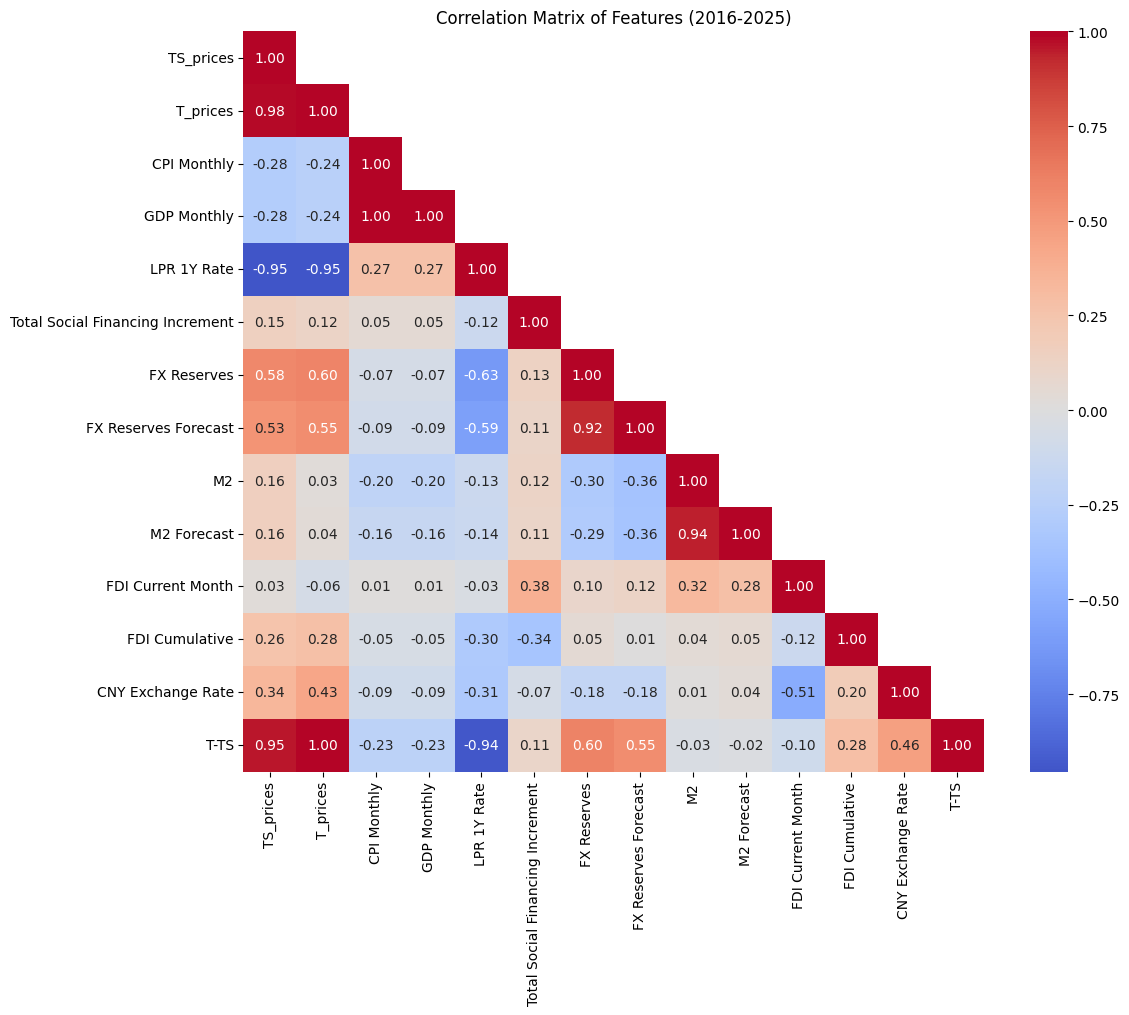

In [25]:
import seaborn as sns

# Filter data after 2016
spread_df_combined_filtered = spread_df_combined[spread_df_combined.index >= '2016-01-01']

# Calculate the correlation matrix for numeric columns, excluding date column
correlation = spread_df_combined_filtered.select_dtypes(include=['float64']).dropna().corr()

# Create a heatmap with improved readability
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt='.2f',
            square=True,
            mask=np.triu(np.ones_like(correlation), k=1))  # Show only lower triangle

plt.title('Correlation Matrix of Features (2016-2025)')
plt.tight_layout()
plt.show()

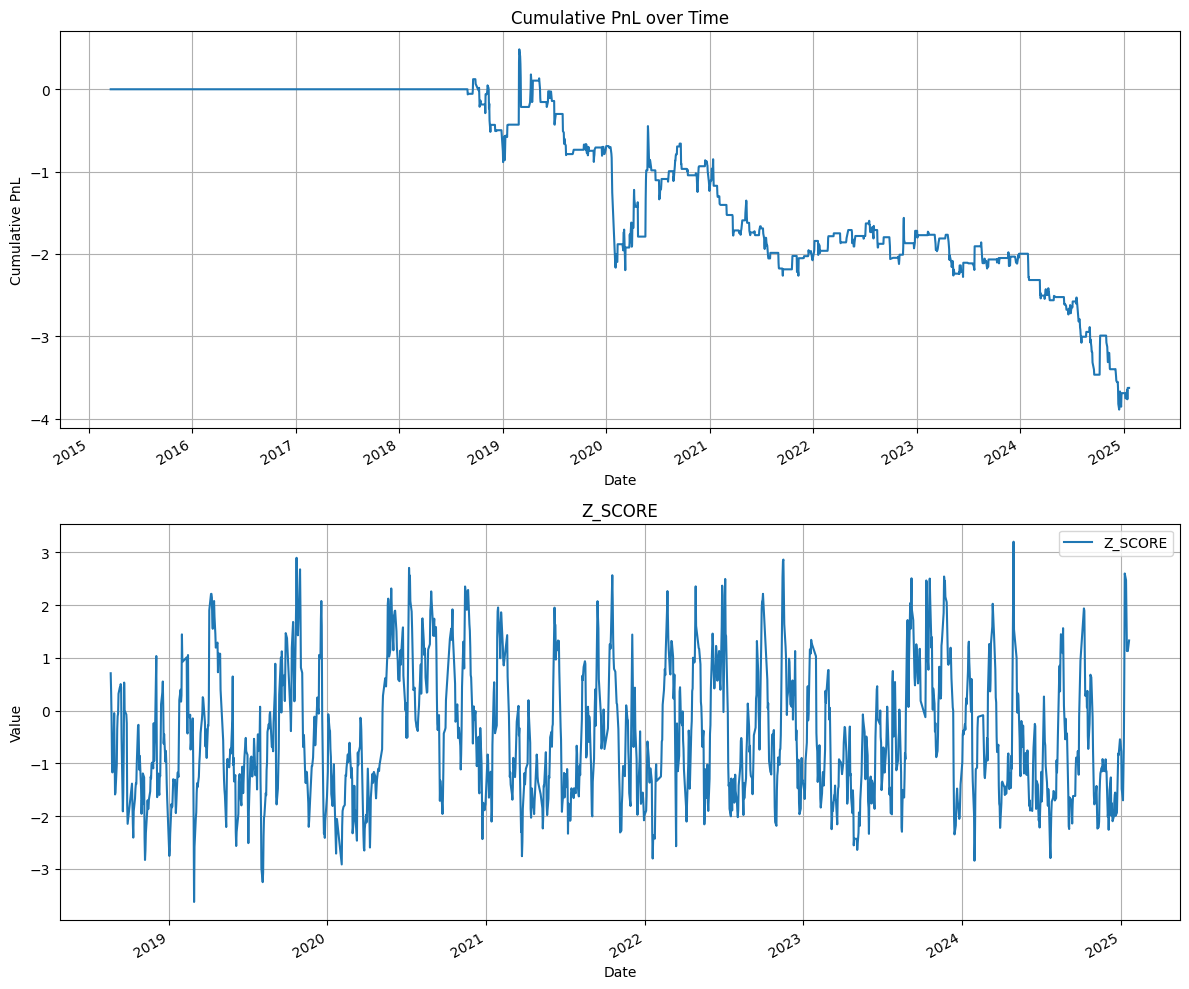

In [11]:
# Combine the TS_df and macro_data
# Resample macro_data to daily frequency and forward fill the values
macro_data_daily = macro_data.set_index("Date").resample("D").ffill().reset_index()

# Merge TS_df with macro_data_daily
TS_df_combined = TS_df.reset_index().merge(macro_data_daily, left_on="date", right_on="Date", how="left").set_index(["underlying_symbol", "date"])

# Display the combined DataFrame
TS_df_combined.columns

# 策略调整
entry_threshold = 1.5
exit_threshold = 1
look_back_window = 20

T_prices = (T_df["open"] + T_df["close"]) / 2
TS_prices = (TS_df["open"] + TS_df["close"]) / 2

# 基点价值计算（久期近似值）
T_BPV = 7.5 / 100 * 1_000_000
TS_BPV = 4.5 / 100 * 1_000_000
BPV_ratio = T_BPV / TS_BPV

spread_df = pd.DataFrame(
    {
        "TS_prices": TS_prices.droplevel(level=0),
        "T_prices": T_prices.droplevel(level=0),
        "BPV_ratio": BPV_ratio,
        "entry_threshold": entry_threshold,
        "exit_threshold": exit_threshold,
        "look_back_window": look_back_window,
    }
)

# 计算价差
spread_df["T-2TS"] = TS_prices.droplevel(level=0) - 2 * TS_prices.droplevel(level=0) / BPV_ratio

# 计算移动均值和标准差
spread_df["MEAN"] = spread_df["T-2TS"].rolling(window=look_back_window, min_periods=1).mean()
spread_df["SD"] = spread_df["T-2TS"].rolling(window=look_back_window, min_periods=1).std()
spread_df["Z_SCORE"] = (spread_df["T-2TS"] - spread_df["MEAN"]) / spread_df["SD"]

# 初始化持仓状态
spread_df["POSITION_T"] = 0
spread_df["POSITION_TS"] = 0
# 记录每日持仓和盈亏
spread_df["PNL"] = 0
spread_df["CUM_PNL"] = 0

for i in range(len(spread_df)):
    if spread_df.iloc[i]["Z_SCORE"] < -entry_threshold:
        # 价差过大，卖出T，买入两手TS
        spread_df.at[spread_df.index[i], "POSITION_T"] += -1
        spread_df.at[spread_df.index[i], "POSITION_TS"] += 2
    elif spread_df.iloc[i]["Z_SCORE"] > entry_threshold:
        # 价差过小，买入T，卖出两手TS
        spread_df.at[spread_df.index[i], "POSITION_T"] += 1
        spread_df.at[spread_df.index[i], "POSITION_TS"] += -2
    elif abs(spread_df.iloc[i]["Z_SCORE"]) <= exit_threshold:
        # 价差回归，平仓
        spread_df.at[spread_df.index[i], "POSITION_T"] = 0
        spread_df.at[spread_df.index[i], "POSITION_TS"] = 0

    # 计算当日盈亏
    if i > 0:
        position_T = spread_df.iloc[i - 1]["POSITION_T"]
        position_TS = spread_df.iloc[i - 1]["POSITION_TS"]
        daily_pnl = position_T * (spread_df.iloc[i]["T_prices"] - spread_df.iloc[i - 1]["T_prices"]) + position_TS * (
            spread_df.iloc[i]["TS_prices"] - spread_df.iloc[i - 1]["TS_prices"]
        )
        spread_df.at[spread_df.index[i], "PNL"] = daily_pnl
        spread_df.at[spread_df.index[i], "CUM_PNL"] = spread_df.iloc[: i + 1]["PNL"].sum()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot Cumulative PnL
spread_df["CUM_PNL"].plot(ax=ax1)
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative PnL")
ax1.set_title("Cumulative PnL over Time")
ax1.grid(True)

# Plot Z_SCORE
spread_df["Z_SCORE"].plot(ax=ax2, label="Z_SCORE")
ax2.set_xlabel("Date")
ax2.set_ylabel("Value")
ax2.set_title("Z_SCORE")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
# Create directory if it doesn't exist
os.makedirs(os.path.join(".", "plot"), exist_ok=True)
plt.savefig(os.path.join(".", "plot", "T_2TS.png"))
plt.show()

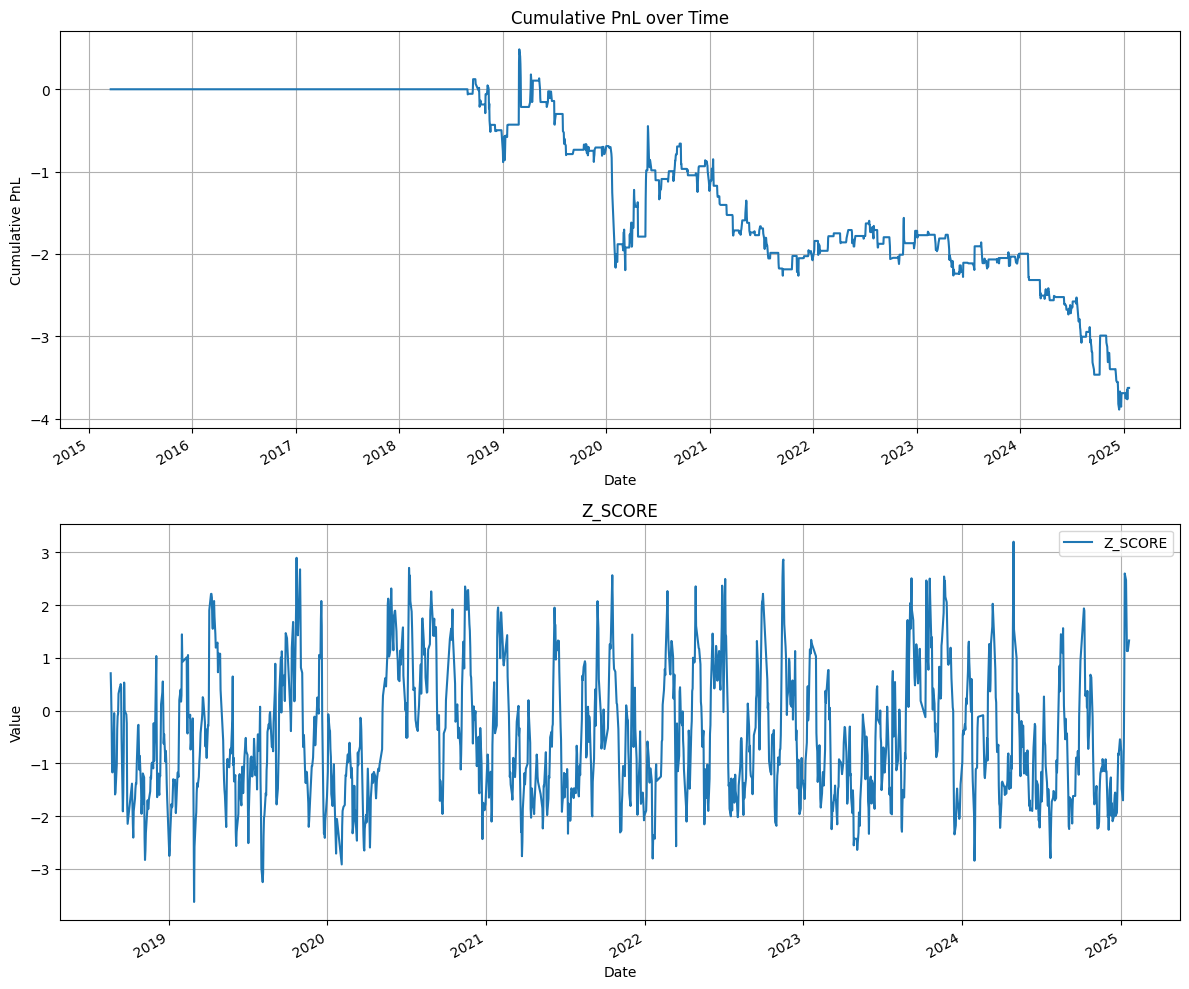

In [12]:
# 策略调整
entry_threshold = 1.5
exit_threshold = 1
look_back_window = 20

T_prices = (T_df["open"] + T_df["close"]) / 2
TS_prices = (TS_df["open"] + TS_df["close"]) / 2

# 基点价值计算（久期近似值）
T_BPV = 7.5 / 100 * 1_000_000
TS_BPV = 4.5 / 100 * 1_000_000
BPV_ratio = T_BPV / TS_BPV

spread_df = pd.DataFrame(
    {
        "TS_prices": TS_prices.droplevel(level=0),
        "T_prices": T_prices.droplevel(level=0),
        "BPV_ratio": BPV_ratio,
        "entry_threshold": entry_threshold,
        "exit_threshold": exit_threshold,
        "look_back_window": look_back_window,
    }
)

# 计算价差
spread_df["T-2TS"] = TS_prices.droplevel(level=0) - 2 * TS_prices.droplevel(level=0) / BPV_ratio

# 计算移动均值和标准差
spread_df["MEAN"] = spread_df["T-2TS"].rolling(window=look_back_window, min_periods=1).mean()
spread_df["SD"] = spread_df["T-2TS"].rolling(window=look_back_window, min_periods=1).std()
spread_df["Z_SCORE"] = (spread_df["T-2TS"] - spread_df["MEAN"]) / spread_df["SD"]

# 初始化持仓状态
spread_df["POSITION_T"] = 0
spread_df["POSITION_TS"] = 0
# 记录每日持仓和盈亏
spread_df["PNL"] = 0
spread_df["CUM_PNL"] = 0

for i in range(len(spread_df)):
    if spread_df.iloc[i]["Z_SCORE"] < -entry_threshold:
        # 价差过大，卖出T，买入两手TS
        spread_df.at[spread_df.index[i], "POSITION_T"] += -1
        spread_df.at[spread_df.index[i], "POSITION_TS"] += 2
    elif spread_df.iloc[i]["Z_SCORE"] > entry_threshold:
        # 价差过小，买入T，卖出两手TS
        spread_df.at[spread_df.index[i], "POSITION_T"] += 1
        spread_df.at[spread_df.index[i], "POSITION_TS"] += -2
    elif abs(spread_df.iloc[i]["Z_SCORE"]) <= exit_threshold:
        # 价差回归，平仓
        spread_df.at[spread_df.index[i], "POSITION_T"] = 0
        spread_df.at[spread_df.index[i], "POSITION_TS"] = 0

    # 计算当日盈亏
    if i > 0:
        position_T = spread_df.iloc[i - 1]["POSITION_T"]
        position_TS = spread_df.iloc[i - 1]["POSITION_TS"]
        daily_pnl = position_T * (spread_df.iloc[i]["T_prices"] - spread_df.iloc[i - 1]["T_prices"]) + position_TS * (
            spread_df.iloc[i]["TS_prices"] - spread_df.iloc[i - 1]["TS_prices"]
        )
        spread_df.at[spread_df.index[i], "PNL"] = daily_pnl
        spread_df.at[spread_df.index[i], "CUM_PNL"] = spread_df.iloc[: i + 1]["PNL"].sum()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot Cumulative PnL
spread_df["CUM_PNL"].plot(ax=ax1)
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative PnL")
ax1.set_title("Cumulative PnL over Time")
ax1.grid(True)

# Plot Z_SCORE
spread_df["Z_SCORE"].plot(ax=ax2, label="Z_SCORE")
ax2.set_xlabel("Date")
ax2.set_ylabel("Value")
ax2.set_title("Z_SCORE")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
# Create directory if it doesn't exist
os.makedirs(os.path.join(".", "plot"), exist_ok=True)
plt.savefig(os.path.join(".", "plot", "T_2TS.png"))
plt.show()

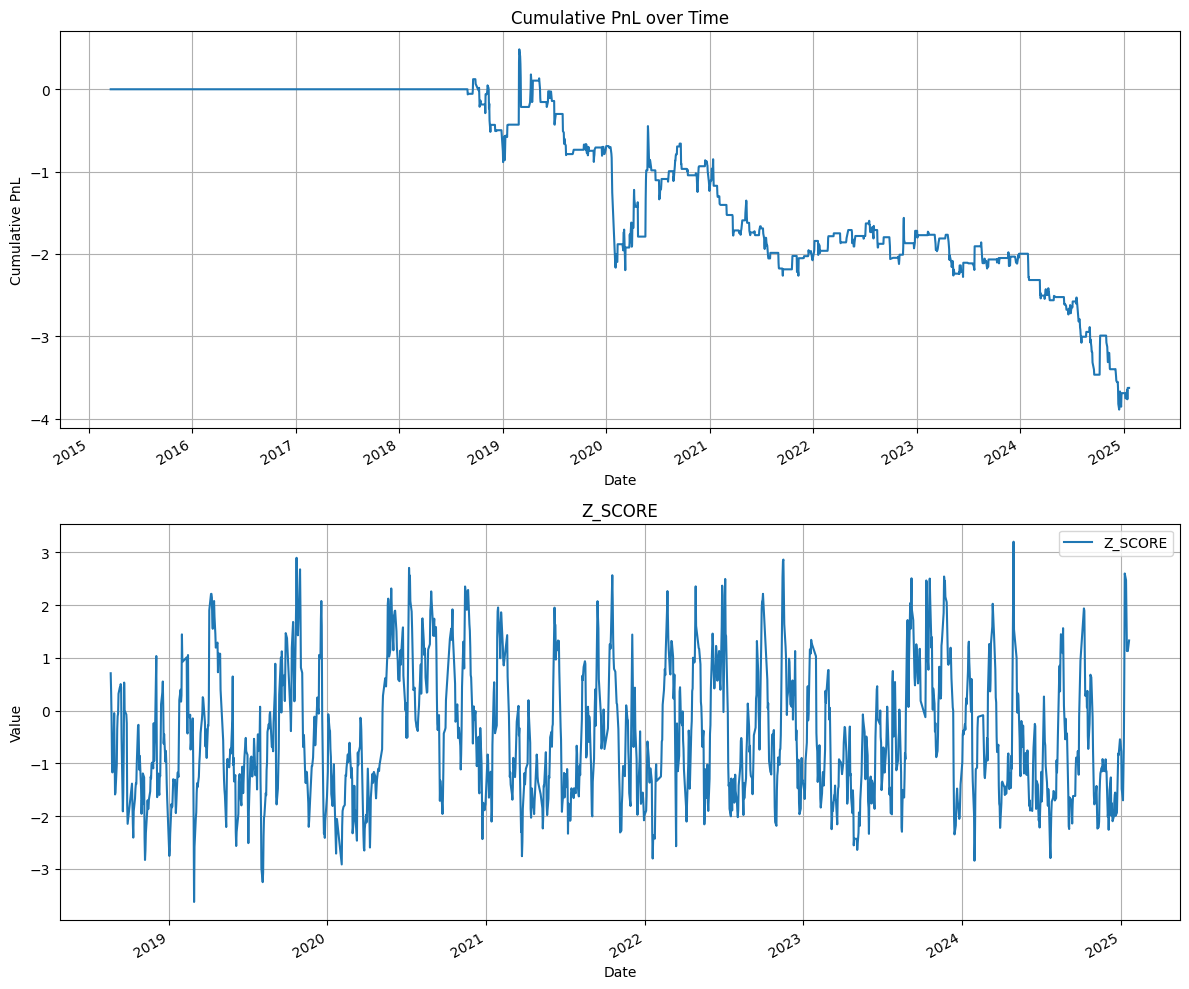

In [13]:
# 策略调整
entry_threshold = 1.5
exit_threshold = 1
look_back_window = 20

T_prices = (T_df["open"] + T_df["close"]) / 2
TS_prices = (TS_df["open"] + TS_df["close"]) / 2

# 基点价值计算（久期近似值）
T_BPV = 7.5 / 100 * 1_000_000
TS_BPV = 4.5 / 100 * 1_000_000
BPV_ratio = T_BPV / TS_BPV

spread_df = pd.DataFrame(
    {
        "TS_prices": TS_prices.droplevel(level=0),
        "T_prices": T_prices.droplevel(level=0),
        "BPV_ratio": BPV_ratio,
        "entry_threshold": entry_threshold,
        "exit_threshold": exit_threshold,
        "look_back_window": look_back_window,
    }
)

# 计算价差
spread_df["T-2TS"] = TS_prices.droplevel(level=0) - 2 * TS_prices.droplevel(level=0) / BPV_ratio

# 计算移动均值和标准差
spread_df["MEAN"] = spread_df["T-2TS"].rolling(window=look_back_window, min_periods=1).mean()
spread_df["SD"] = spread_df["T-2TS"].rolling(window=look_back_window, min_periods=1).std()
spread_df["Z_SCORE"] = (spread_df["T-2TS"] - spread_df["MEAN"]) / spread_df["SD"]

# 初始化持仓状态
spread_df["POSITION_T"] = 0
spread_df["POSITION_TS"] = 0
# 记录每日持仓和盈亏
spread_df["PNL"] = 0
spread_df["CUM_PNL"] = 0

for i in range(len(spread_df)):
    if spread_df.iloc[i]["Z_SCORE"] < -entry_threshold:
        # 价差过大，卖出T，买入两手TS
        spread_df.at[spread_df.index[i], "POSITION_T"] += -1
        spread_df.at[spread_df.index[i], "POSITION_TS"] += 2
    elif spread_df.iloc[i]["Z_SCORE"] > entry_threshold:
        # 价差过小，买入T，卖出两手TS
        spread_df.at[spread_df.index[i], "POSITION_T"] += 1
        spread_df.at[spread_df.index[i], "POSITION_TS"] += -2
    elif abs(spread_df.iloc[i]["Z_SCORE"]) <= exit_threshold:
        # 价差回归，平仓
        spread_df.at[spread_df.index[i], "POSITION_T"] = 0
        spread_df.at[spread_df.index[i], "POSITION_TS"] = 0

    # 计算当日盈亏
    if i > 0:
        position_T = spread_df.iloc[i - 1]["POSITION_T"]
        position_TS = spread_df.iloc[i - 1]["POSITION_TS"]
        daily_pnl = position_T * (spread_df.iloc[i]["T_prices"] - spread_df.iloc[i - 1]["T_prices"]) + position_TS * (
            spread_df.iloc[i]["TS_prices"] - spread_df.iloc[i - 1]["TS_prices"]
        )
        spread_df.at[spread_df.index[i], "PNL"] = daily_pnl
        spread_df.at[spread_df.index[i], "CUM_PNL"] = spread_df.iloc[: i + 1]["PNL"].sum()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot Cumulative PnL
spread_df["CUM_PNL"].plot(ax=ax1)
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative PnL")
ax1.set_title("Cumulative PnL over Time")
ax1.grid(True)

# Plot Z_SCORE
spread_df["Z_SCORE"].plot(ax=ax2, label="Z_SCORE")
ax2.set_xlabel("Date")
ax2.set_ylabel("Value")
ax2.set_title("Z_SCORE")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
# Create directory if it doesn't exist
os.makedirs(os.path.join(".", "plot"), exist_ok=True)
plt.savefig(os.path.join(".", "plot", "T_2TS.png"))
plt.show()

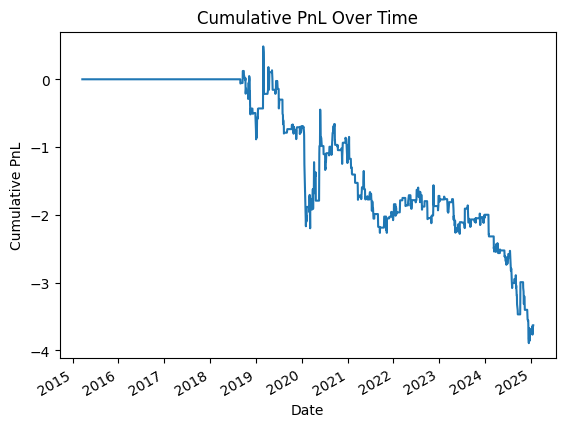

In [14]:
spread_df['CUM_PNL'].plot(title='Cumulative PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.show()

In [15]:
spread_df

,TS_prices,T_prices,BPV_ratio,entry_threshold,exit_threshold,look_back_window,T-2TS,MEAN,SD,Z_SCORE,POSITION_T,POSITION_TS,PNL,CUM_PNL
date,,,,,,,,,,,,,,
2015-03-20,NaN,82.4750,1.666667,1.5,1,20,NaN,NaN,NaN,NaN,0,0,0.000,0.000
2015-03-23,NaN,82.5375,1.666667,1.5,1,20,NaN,NaN,NaN,NaN,0,0,NaN,0.000
2015-03-24,NaN,82.5075,1.666667,1.5,1,20,NaN,NaN,NaN,NaN,0,0,NaN,0.000
2015-03-25,NaN,82.4150,1.666667,1.5,1,20,NaN,NaN,NaN,NaN,0,0,NaN,0.000
2015-03-26,NaN,82.0825,1.666667,1.5,1,20,NaN,NaN,NaN,NaN,0,0,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-14,102.791,109.0500,1.666667,1.5,1,20,-20.5582,-20.59232,0.019903,1.714272,1,-2,-0.115,-3.766
2025-01-15,102.842,109.2900,1.666667,1.5,1,20,-20.5684,-20.59159,0.020521,1.130036,0,0,0.138,-3.628
2025-01-16,102.825,109.2675,1.666667,1.5,1,20,-20.5650,-20.59063,0.021319,1.202216,0,0,-0.000,-3.628
